# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Amrul Fadhil Yofan
- Email: amrul.yofan@gmail.com
- Id Dicoding: amrul_fy (Username)

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan total peminjaman sepeda pada tahun 2011 dengan total peminjaman sepeda pada tahun 2012? Apakah ada peningkatan yang cukup signifikan, atau justru terjadi penurunan?
- Apakah ada pengaruh antara cuaca dan kondisi lingkungan (mencakup suhu, kelembapan, dan kecepatan angin) dengan jumlah peminjaman sepeda?

## Menyiapkan Semua Library yang Dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data_hour = "/content/drive/My Drive/Data Rep/Bike Sharing Dataset/hour.csv"
data_day = "/content/drive/My Drive/Data Rep/Bike Sharing Dataset/day.csv"

df_hour = pd.read_csv(data_hour)
df_day = pd.read_csv(data_day)

Dalam program ini, data diambil dari penyimpanan google drive saya. Untuk mengupload data baru, upload data csv yang ada di folder "data" ke dalam google colab.

In [4]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

DIlakukan proses *assessing data* untuk melihat apakah ada kesalahan-kesalahan data yang perlu diperbaiki. Terlebih dahulu ditinjau informasi-informasi yang ada pada data tersebut.

In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
#df_hour.isna().sum()
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
#df_day.isna().sum()
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
print("Jumlah duplikasi tabel 1: ", df_hour.duplicated().sum())
print("Jumlah duplikasi tabel 2: ", df_day.duplicated().sum())

Jumlah duplikasi tabel 1:  0
Jumlah duplikasi tabel 2:  0


Diperoleh hasil identifikasi masalah pada data, yakni sebagai berikut.

In [11]:
df_table_assess = pd.DataFrame({
    "Data Type": ['Terdapat kesalahan tipe data untuk kolom dteday (seharusnya bertipe data datetime)', 'Terdapat kesalahan tipe data untuk kolom dteday (seharusnya bertipe data datetime)'],
    "Missing Value": ['-', '-'],
    "Duplicate Data": ['-', '-'],
    "Inaccurate Value": ['-', '-']
})
df_table_assess.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["df_hour", "df_day"], axis=0)

,DATA TYPE,MISSING VALUE,DUPLICATE DATA,INACCURATE VALUE
df_hour,Terdapat kesalahan tipe data untuk kolom dteday (seharusnya bertipe data datetime),-,-,-
df_day,Terdapat kesalahan tipe data untuk kolom dteday (seharusnya bertipe data datetime),-,-,-


### Cleaning Data

Diperoleh hanya ada satu permasalahan, yaitu ada kesalahan tipe data untuk kolom "dteday". Dalam hal ini, akan diubah ke bentuk tipe data datetime.

In [12]:
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

In [13]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [14]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Deskripsi Data

Ditinjau beberapa deskripsi data secara statistik sebagai berikut.

In [16]:
df_hour.describe(include="all")

<ipython-input-16-29824b046db5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_hour.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [17]:
df_day.describe(include="all")

<ipython-input-17-202ba9014e68>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


### Jumlah Data Pada Beberapa Kolom dan Melakukan Perhitungan Statistik

Ditinjau jumlah data pada beberapa kolom, yakni kolom "cnt" dan "season". Kolom "cnt" merepresentasikan jumlah orang yang melakukan peminjaman sepeda, sedangkan "season" merepresentasikan jenis musim yang ada di wilayah tersebut.

In [18]:
df_hour["cnt"].value_counts()

5      260
6      236
4      231
3      224
2      208
      ... 
913      1
847      1
777      1
661      1
636      1
Name: cnt, Length: 869, dtype: int64

In [19]:
df_day["cnt"].value_counts()

5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5046    1
4713    1
4763    1
4785    1
2729    1
Name: cnt, Length: 696, dtype: int64

In [20]:
df_day["season"].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

Dibentuk tabel baru yang berisikan data statistika secara spesifik (mencakup rata-rata dan standar deviasi) pada kolom "cnt" yang dihitung berdasarkan jam.

In [21]:
df_hour.groupby(by="hr").agg({
    "instant": "count",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
     count  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

Berikut tabel lain yang dihitung berdasarkan hari.

In [22]:
df_day.groupby(by="mnth").agg({
    "instant": "count",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       count   max   min         mean          std
mnth                                              
1         62  4521   431  2176.338710  1161.674370
2         57  5062  1005  2655.298246  1145.313307
3         62  8362   605  3692.258065  1899.301812
4         60  7460   795  4484.900000  1776.160778
5         62  8294  2633  5349.774194  1298.711561
6         60  8120  3767  5772.366667  1240.400031
7         62  8173  3285  5563.677419  1273.751871
8         62  7865  1115  5664.419355  1494.516146
9         60  8714  1842  5766.516667  1810.130649
10        62  8156    22  5199.225806  1988.392517
11        60  6852  1495  4247.183333  1285.712709
12        62  6606   441  3403.806452  1549.639353

### Pembentukan Tabel Baru Berdasarkan Tahun dan Menganalisis Data

Dataset yang ada dibagi berdasarkan tahun, sehingga dibentuk 4 tabel baru, yakni df_hour_2011, df_hour_2012, df_day_2011, df_day_2012. Tabel df_hour_2011 memuat informasi peminjaman sepeda berdasarkan jam pada tahun 2011. Tabel df_hour_2012 memuat informasi peminjaman sepeda berdasarkan jam pada tahun 2012. Lalu, tabel df_day_2011 dan df_day_2012 memuat informasi peminjaman sepeda berdasarkan hari, masing-masing pada tahun 2011 dan 2012.

In [23]:
df_hour_2011 = df_hour[df_hour['yr'] == 0]
df_hour_2012 = df_hour[df_hour['yr'] == 1]
df_day_2011 = df_day[df_day['yr'] == 0]
df_day_2012 = df_day[df_day['yr'] == 1]

In [24]:
df_day_2012

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Dilakukan proses pengurutan jumlah peminjaman sepeda berdasarkan hari.

In [25]:
df_day_2011["cnt"].sort_values(ascending=False)

184    6043
196    5923
234    5895
140    5805
195    5538
       ... 
301     627
68      623
64      605
25      506
26      431
Name: cnt, Length: 365, dtype: int64

In [26]:
df_day_2012["cnt"].sort_values(ascending=False)

623    8714
637    8555
630    8395
447    8362
504    8294
       ... 
477    1027
724    1013
723     920
725     441
667      22
Name: cnt, Length: 366, dtype: int64

Jumlah peminjaman sepeda tertinggi sebanyak 8714, seddangkan jumlah peminjaman sepeda terendah sebanyak 22, dengan detail informasi dapat dilihat pada baris tabel berikut.

In [27]:
df_day_2012.loc[df_day_2012['cnt'] == 8714]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


In [28]:
df_day_2012.loc[df_day_2012['cnt'] == 22]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22


Dihitung korelasi pada keempat tabel yang ada, yakni sebagai berikut.

In [29]:
df_hour_2011.corr()

<ipython-input-29-e20cfb649e6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_hour_2011.corr()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.824925,NaN,0.996461,-0.008772,0.031203,0.010960,0.003052,-0.020071,0.259605,0.271344,0.188215,-0.154082,0.090751,0.185476,0.178084
season,0.824925,1.000000,NaN,0.829054,-0.012179,-0.001116,-0.013639,0.013763,-0.015351,0.343535,0.351910,0.191793,-0.154735,0.141894,0.220666,0.221719
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,0.996461,0.829054,NaN,1.000000,-0.011814,0.029806,0.012024,0.003573,-0.020662,0.260442,0.272676,0.188061,-0.155645,0.092833,0.186191,0.179273
hr,-0.008772,-0.012179,NaN,-0.011814,1.000000,-0.000929,-0.005618,0.003792,-0.016521,0.120548,0.116382,-0.251188,0.125153,0.303720,0.390313,0.407486
holiday,0.031203,-0.001116,NaN,0.029806,-0.000929,1.000000,-0.076324,-0.247934,0.008001,-0.020059,-0.026915,-0.022895,0.000502,0.052906,-0.046779,-0.022912
weekday,0.010960,-0.013639,NaN,0.012024,-0.005618,-0.076324,1.000000,0.018572,0.027766,-0.038969,-0.042439,-0.051307,0.039586,-0.013475,-0.000500,-0.004321
workingday,0.003052,0.013763,NaN,0.003573,0.003792,-0.247934,0.018572,1.000000,0.068628,0.053405,0.052551,0.025305,0.010509,-0.324750,0.129540,0.011704
weathersit,-0.020071,-0.015351,NaN,-0.020662,-0.016521,0.008001,0.027766,0.068628,1.000000,-0.092036,-0.096556,0.407634,0.048414,-0.159279,-0.118628,-0.143288
temp,0.259605,0.343535,NaN,0.260442,0.120548,-0.020059,-0.038969,0.053405,-0.092036,1.000000,0.992022,-0.039525,-0.005989,0.478931,0.381614,0.451233


In [30]:
df_hour_2012.corr()

<ipython-input-30-1dba4d65b79d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_hour_2012.corr()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.828473,NaN,0.996508,0.002937,0.005269,0.010012,-0.008974,0.030288,0.141716,0.141280,0.140231,-0.113814,0.058109,0.099589,0.099500
season,0.828473,1.000000,NaN,0.831658,-0.000227,-0.017500,0.008735,0.013678,-0.014102,0.280819,0.287019,0.107566,-0.145031,0.113890,0.167440,0.171704
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,0.996508,0.831658,NaN,1.000000,0.000080,0.007797,0.008710,-0.010447,0.031844,0.141886,0.142102,0.139647,-0.115399,0.057845,0.099524,0.099373
hr,0.002937,-0.000227,NaN,0.000080,1.000000,0.001869,-0.001436,0.000782,-0.024181,0.156152,0.152607,-0.305348,0.149324,0.314602,0.402690,0.424046
holiday,0.005269,-0.017500,NaN,0.007797,0.001869,1.000000,-0.126642,-0.256852,-0.041804,-0.035359,-0.035728,0.002675,0.007475,0.017371,-0.054826,-0.041316
weekday,0.010012,0.008735,NaN,0.008710,-0.001436,-0.126642,1.000000,0.053122,-0.022221,0.037599,0.026845,-0.023589,-0.016778,0.066568,0.039307,0.051171
workingday,-0.008974,0.013678,NaN,-0.010447,0.000782,-0.256852,0.053122,1.000000,0.019844,0.057800,0.057201,0.005521,-0.034252,-0.298508,0.151461,0.045821
weathersit,0.030288,-0.014102,NaN,0.031844,-0.024181,-0.041804,-0.022221,0.019844,1.000000,-0.112866,-0.114105,0.429350,0.002584,-0.151752,-0.127340,-0.148346
temp,0.141716,0.280819,NaN,0.141886,0.156152,-0.035359,0.037599,0.057800,-0.112866,1.000000,0.982792,-0.096553,-0.040669,0.463206,0.325386,0.399636


In [31]:
df_day_2011.corr()

<ipython-input-31-30dd04418325>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_day_2011.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.827176,NaN,0.996504,0.033929,0.011811,-0.004646,0.007012,0.289165,0.301958,0.244867,-0.240111,0.166029,0.484911,0.439829
season,0.827176,1.000000,NaN,0.831032,0.000207,-0.011705,0.007137,0.035508,0.373380,0.382972,0.249451,-0.242514,0.250565,0.573166,0.541794
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,0.996504,0.831032,NaN,1.000000,0.032808,0.012860,-0.004288,0.009729,0.288663,0.301920,0.242533,-0.242443,0.169797,0.489148,0.444607
holiday,0.033929,0.000207,NaN,0.032808,1.000000,-0.076087,-0.247461,-0.006442,-0.019272,-0.026448,-0.030896,0.000734,0.089853,-0.111128,-0.049193
weekday,0.011811,-0.011705,NaN,0.012860,-0.076087,1.000000,0.020445,0.047259,-0.039292,-0.042810,-0.065932,0.061525,-0.019604,0.004569,-0.004396
workingday,-0.004646,0.007137,NaN,-0.004288,-0.247461,0.020445,1.000000,0.108654,0.046799,0.046158,0.034250,0.011955,-0.541419,0.310969,0.020661
weathersit,0.007012,0.035508,NaN,0.009729,-0.006442,0.047259,0.108654,1.000000,-0.091175,-0.096894,0.581476,0.109310,-0.279370,-0.267347,-0.318274
temp,0.289165,0.373380,NaN,0.288663,-0.019272,-0.039292,0.046799,-0.091175,1.000000,0.996458,0.145776,-0.114200,0.581038,0.698136,0.771214
atemp,0.301958,0.382972,NaN,0.301920,-0.026448,-0.042810,0.046158,-0.096894,0.996458,1.000000,0.155812,-0.136544,0.581153,0.703381,0.775294


In [32]:
df_day_2012.corr()

<ipython-input-32-0d8cac25ee37>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_day_2012.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.828110,NaN,0.996516,0.003862,0.007054,-0.005725,0.079610,0.144118,0.144274,0.205420,-0.170249,0.095683,0.275060,0.259634
season,0.828110,1.000000,NaN,0.831845,-0.020746,0.005492,0.017797,0.001135,0.293876,0.301294,0.159685,-0.215944,0.198099,0.478133,0.464801
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,0.996516,0.831845,NaN,1.000000,0.006258,0.006152,-0.007513,0.080888,0.147795,0.148564,0.202858,-0.173355,0.099117,0.281855,0.266502
holiday,0.003862,-0.020746,NaN,0.006258,1.000000,-0.126605,-0.258418,-0.063885,-0.039023,-0.039663,0.001403,0.011686,0.029720,-0.164190,-0.118134
weekday,0.007054,0.005492,NaN,0.006152,-0.126605,1.000000,0.051047,0.012820,0.042372,0.030846,-0.039199,-0.032171,0.125130,0.129315,0.156071
workingday,-0.005725,0.017797,NaN,-0.007513,-0.258418,0.051047,1.000000,0.008966,0.059342,0.059028,0.013291,-0.048955,-0.539919,0.437003,0.118884
weathersit,0.079610,0.001135,NaN,0.080888,-0.063885,0.012820,0.008966,1.000000,-0.151161,-0.146664,0.600378,-0.037288,-0.223149,-0.315485,-0.345913
temp,0.144118,0.293876,NaN,0.147795,-0.039023,0.042372,0.059342,-0.151161,1.000000,0.986165,0.118262,-0.203691,0.542253,0.607425,0.713793
atemp,0.144274,0.301294,NaN,0.148564,-0.039663,0.030846,0.059028,-0.146664,0.986165,1.000000,0.134662,-0.233086,0.543917,0.614727,0.720314


Secara umum, korelasi antar kolom di atas tidak terlalu besar. Hanya ada beberapa kolom yang memiliki korelasi yang besar, seperti kolom "cnt" yang berkorelasi dengan kolom "registered", dengan nilai korelasi sebesar 0.912994.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan total peminjaman sepeda pada tahun 2011 dengan total peminjaman sepeda pada tahun 2012? Apakah ada peningkatan yang cukup signifikan, atau justru terjadi penurunan?

Dibentuk diagram batang untuk melihat bagaimana perbandingan secara visual antara total peminjaman sepeda tahun 2011 dengan total peminjaman sepeda tahun 2012.

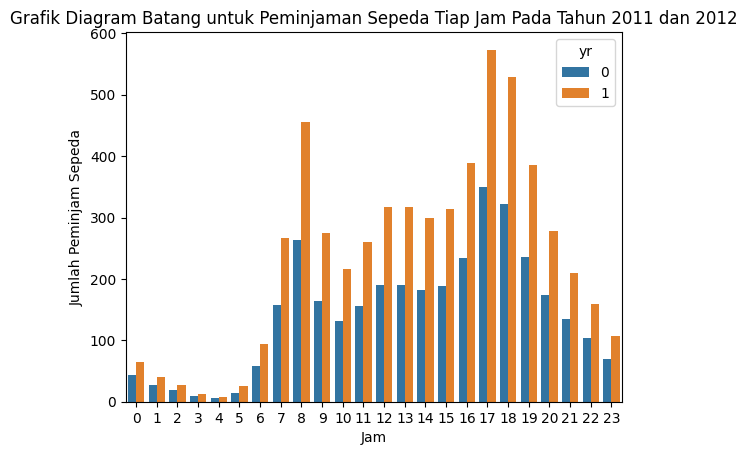

In [33]:
sns.barplot(x=df_hour.hr, y=df_hour.cnt, hue=df_hour.yr, errorbar=None)
plt.title("Grafik Diagram Batang untuk Peminjaman Sepeda Tiap Jam Pada Tahun 2011 dan 2012")
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjam Sepeda')
plt.show()

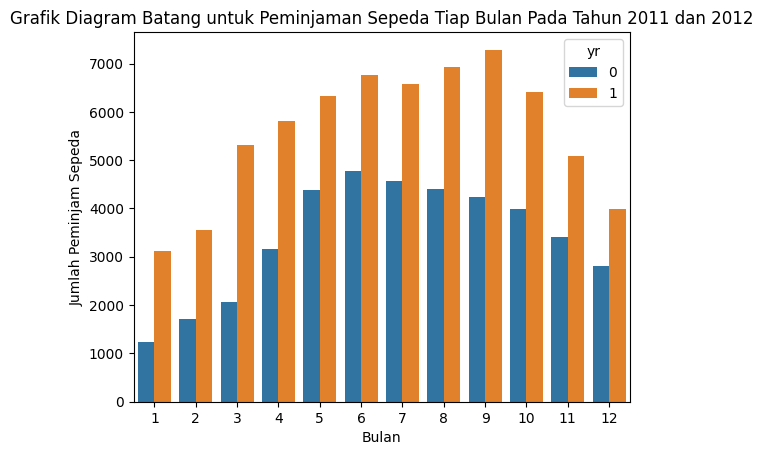

In [34]:
sns.barplot(x=df_day.mnth, y=df_day.cnt, hue=df_day.yr, errorbar=None)
plt.title("Grafik Diagram Batang untuk Peminjaman Sepeda Tiap Bulan Pada Tahun 2011 dan 2012")
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjam Sepeda')
plt.show()

Secara signifikan, dapat dilihat bahwa tahun 2012 mengalami kenaikan jumlah peminjaman sepeda dibandingan tahun 2011, baik perbandingan berdasarkan jam maupun bulan. Pada tahun 2011, jumlah peminjaman sepeda tertinggi terjadi pada bulan Juni, serta waktu peminjaman sepeda yang paling banyak terjadi pada jam 17 (5 sore). Pada tahun 2012, jumlah peminjaman sepeda tertinggi terjadi pada bulan September, serta waktu peminjaman sepeda yang paling banyak terjadi pada jam 17 (5 sore).  

Berikut ini diberikan diagram garis untuk melihat jumlah peminjaman sepeda secara harian pada tahun 2011.

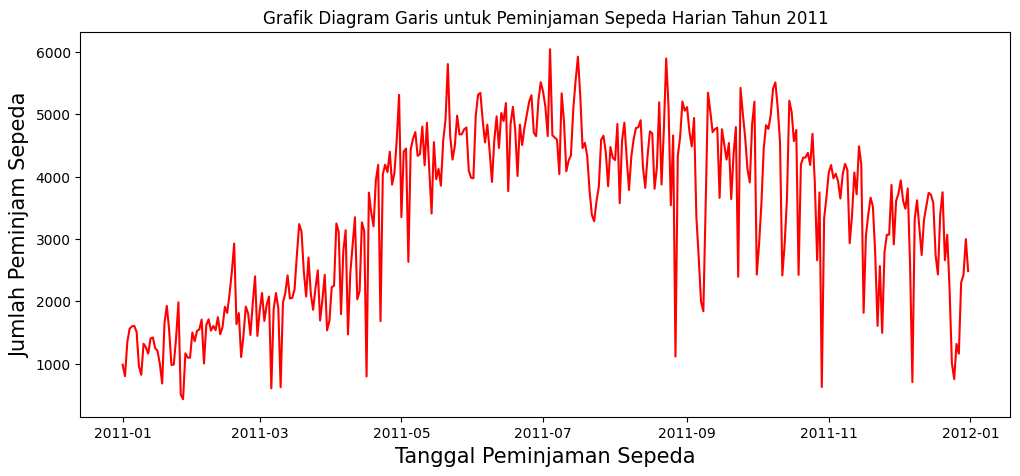

In [35]:
plt.figure(figsize=(12, 5))
plt.plot(df_day_2011['dteday'], df_day_2011['cnt'], color='red')
plt.title("Grafik Diagram Garis untuk Peminjaman Sepeda Harian Tahun 2011")
plt.xlabel('Tanggal Peminjaman Sepeda',size=15)
plt.ylabel('Jumlah Peminjam Sepeda',size=15)
plt.show()

Berikut ini diberikan diagram garis untuk melihat jumlah peminjaman sepeda secara harian pada tahun 2012.

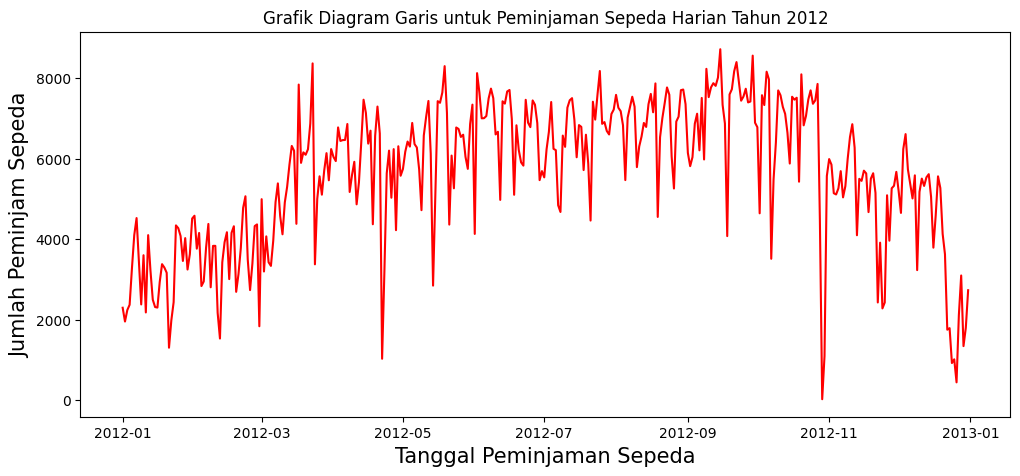

In [36]:
plt.figure(figsize=(12, 5))
plt.plot(df_day_2012['dteday'], df_day_2012['cnt'], color='red')
plt.title("Grafik Diagram Garis untuk Peminjaman Sepeda Harian Tahun 2012")
plt.xlabel('Tanggal Peminjaman Sepeda',size=15)
plt.ylabel('Jumlah Peminjam Sepeda',size=15)
plt.show()

Berikut ini diberikan diagram garis untuk melihat jumlah peminjaman sepeda secara harian dari tahun 2011 ke tahun 2012.

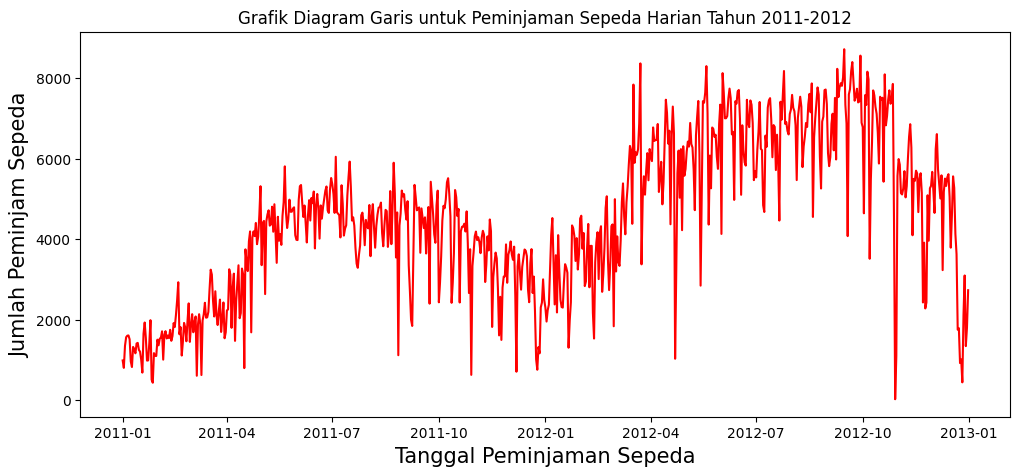

In [37]:
plt.figure(figsize=(12, 5))
plt.plot(df_day['dteday'], df_day['cnt'], color='red')
plt.title("Grafik Diagram Garis untuk Peminjaman Sepeda Harian Tahun 2011-2012")
plt.xlabel('Tanggal Peminjaman Sepeda',size=15)
plt.ylabel('Jumlah Peminjam Sepeda',size=15)
plt.show()

### Pertanyaan 2: Apakah ada korelasi antara cuaca dan kondisi lingkungan (mencakup suhu, kelembapan, dan kecepatan angin) dengan jumlah peminjaman sepeda?

Dilakukan perhitungan korelasi antara kolom "cnt" dengan kolom lainnya yang disajikan di bawah ini.

In [38]:
df_hour_2012.corr()["cnt"]

<ipython-input-38-58fa6c57a8ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_hour_2012.corr()["cnt"]


instant       0.099500
season        0.171704
yr                 NaN
mnth          0.099373
hr            0.424046
holiday      -0.041316
weekday       0.051171
workingday    0.045821
weathersit   -0.148346
temp          0.399636
atemp         0.396393
hum          -0.344065
windspeed     0.111155
casual        0.676187
registered    0.970975
cnt           1.000000
Name: cnt, dtype: float64

Dibentuk grafik diagram batang untuk melihat korelasi antara kolom "cnt" dengan kolom yang berkaitan dengan cuaca dan kondisi lingkungan (mencakup suhu, kelembapan, dan kecepatan angin). Dalam hal ini, dipilih 5 kolom, yakni 'weathersit', 'temp', 'atemp', 'hum', dan 'windspeed'.

Berikut ini merupakan diagram batang untuk melihat perbandingan korelasi berdasarkan jam antara kolom-kolom yang telah dipilih pada tahun 2011 dan 2012.

<Axes: >

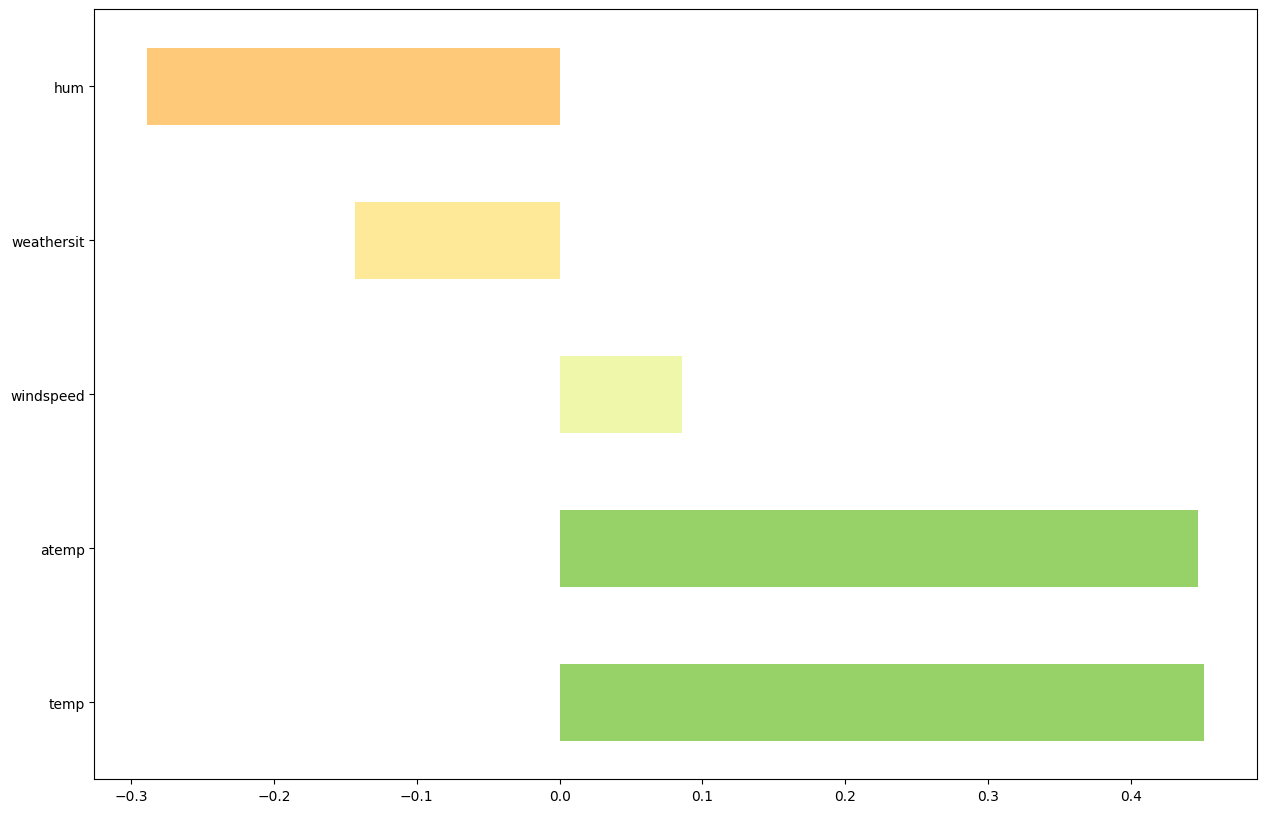

In [39]:
columns = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

def get_corr(df):
  cor = df.corr().unstack()
  cor = cor['cnt'].sort_values(ascending=False)
  cor = cor.drop('cnt')
  return cor

corr_hour_2011 = get_corr(df_hour_2011[columns])
fig, ax = plt.subplots(figsize=(15,10))
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
colors = [plt.cm.RdYlGn(norm(c)) for c in corr_hour_2011.values]

corr_hour_2011.plot.barh(color=colors)

<Axes: >

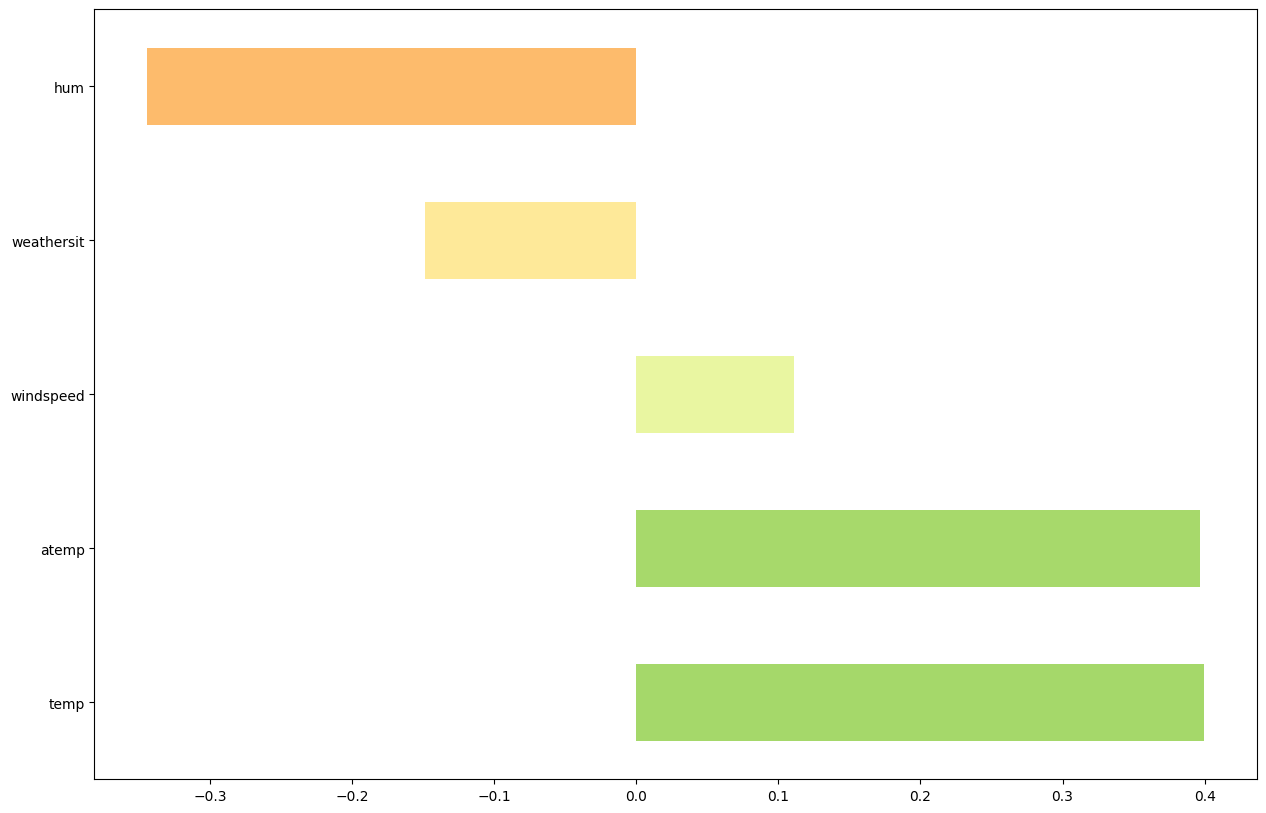

In [40]:
corr_hour_2012 = get_corr(df_hour_2012[columns])
fig, ax = plt.subplots(figsize=(15,10))
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
colors = [plt.cm.RdYlGn(norm(c)) for c in corr_hour_2012.values]

corr_hour_2012.plot.barh(color=colors)

Berikut ini merupakan diagram batang untuk melihat perbandingan korelasi berdasarkan hari antara kolom-kolom yang telah dipilih pada tahun 2011 dan 2012.

<Axes: >

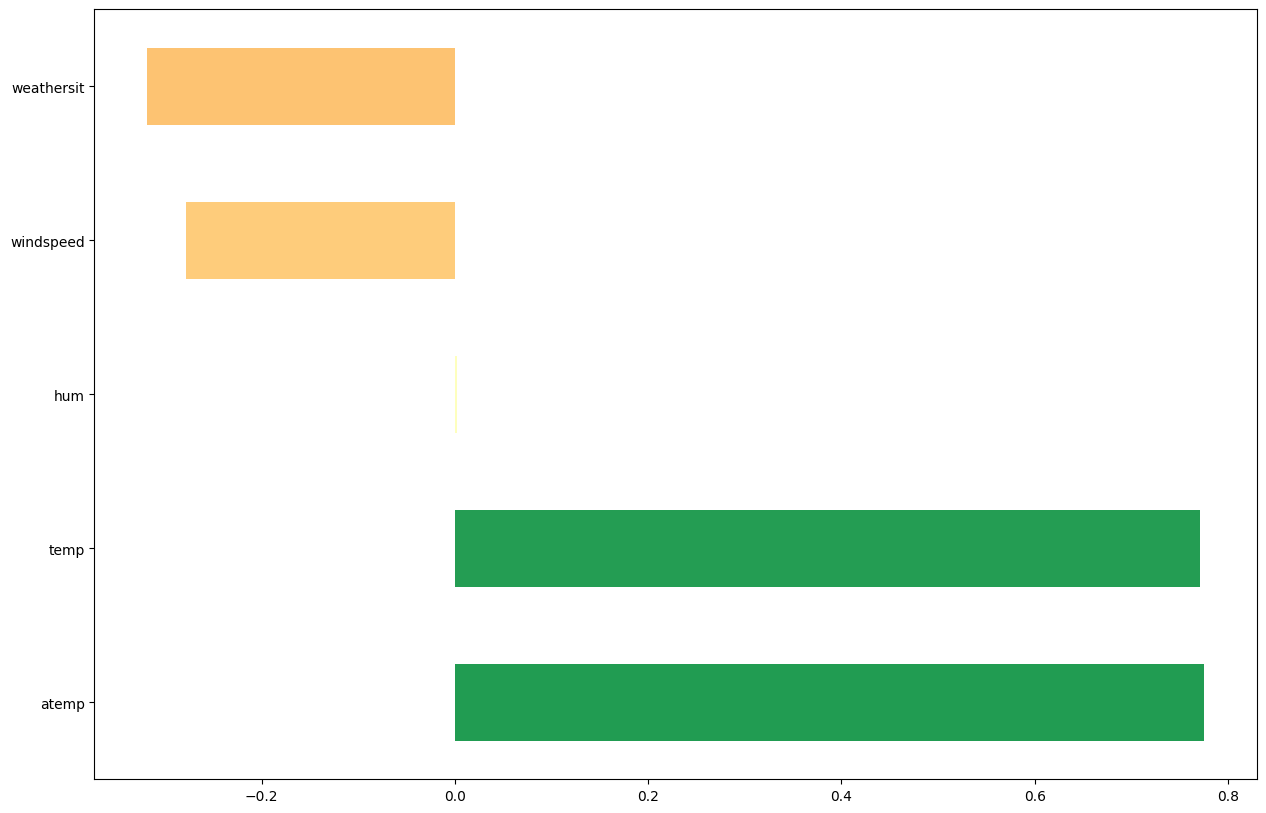

In [41]:
corr_day_2011 = get_corr(df_day_2011[columns])
fig, ax = plt.subplots(figsize=(15,10))
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
colors = [plt.cm.RdYlGn(norm(c)) for c in corr_day_2011.values]

corr_day_2011.plot.barh(color=colors)

<Axes: >

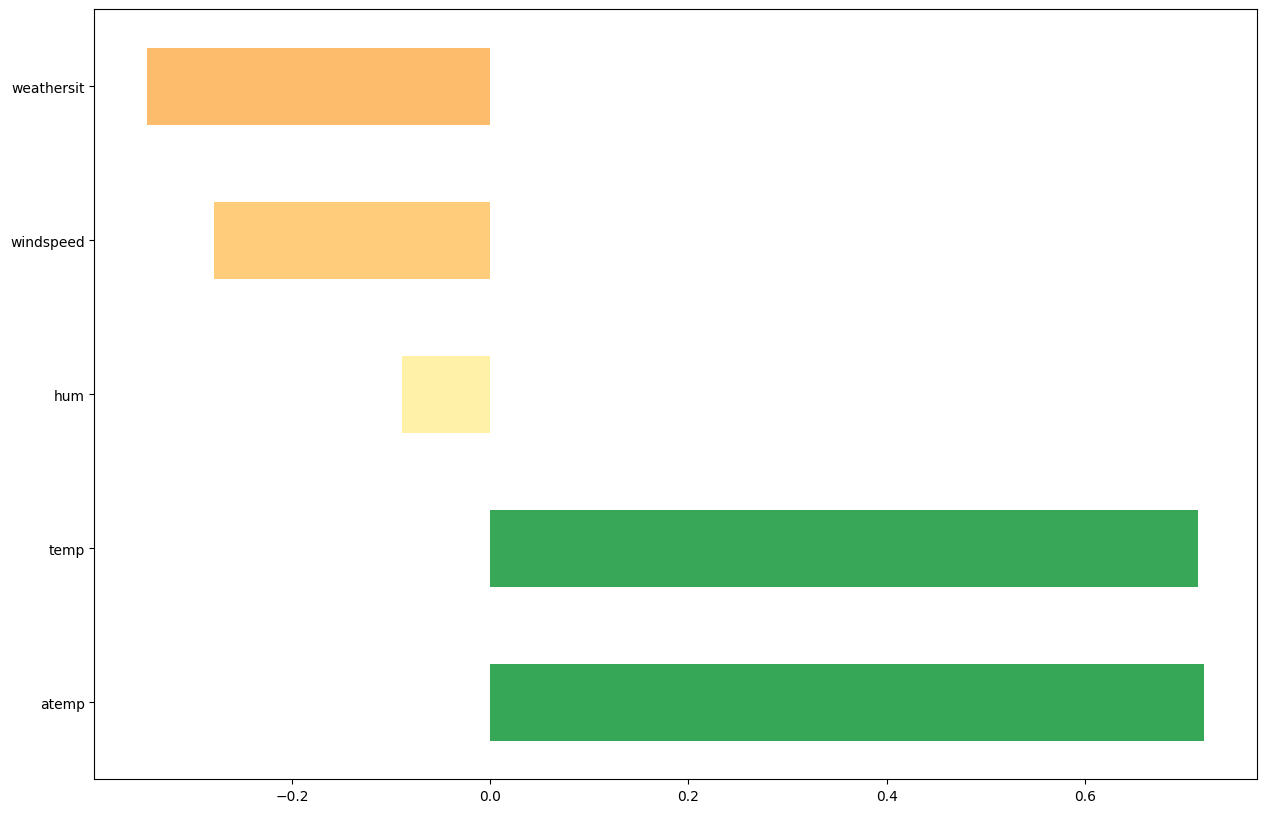

In [42]:
corr_day_2012 = get_corr(df_day_2012[columns])
fig, ax = plt.subplots(figsize=(15,10))
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
colors = [plt.cm.RdYlGn(norm(c)) for c in corr_day_2012.values]

corr_day_2012.plot.barh(color=colors)

## Conclusion (Kesimpulan)

- Kesimpulan pertanyaan 1

Ada peningkatan jumlah total peminjaman sepeda yang cukup signifikan pada tahun 2012 dibandingkan dengan total peminjaman sepeda pada tahun 2011. Hal itu terlihat pada diagram yang telah disajikan. Perbedaan jumlah total peminjaman sepeda tersebut dapat terlihat apabila ditinjau berdasarkan tiap jam dan bulan, masing-masing melalui dua dataset berbeda. Jika dilihat secara keseluruhan (dari hari ke hari), peningkatan jumlah peinjaman sepeda dari tahun 2011 ke 2012 tidak terlalu drastis dan masih bersifat fluktuatif, dengan jumlah peminjaman paling tinggi sebanyak 8714, pada tanggal 15 September 2012.
- Kesimpulan pertanyaan 2

Jika ditinjau berdasarkan jam (dataset df_hour), baik tahun 2011 maupun 2012, korelasi antara cuaca dan kondisi lingkungan (mencakup suhu, kelembapan, dan kecepatan angin) dengan jumlah peminjaman sepeda tidak terlalu tinggi, dengan korelasi tertinggi terdapat pada variabel suhu / *temp* (dengan nilai korelasi sebesar 0.451233 (tahun 2011) dan 0.399636 (tahun 2012)). Jika ditinjau berdasarkan hari (dataset df_day), baik tahun 2011 maupun 2012, korelasi antara cuaca dan kondisi lingkungan (mencakup suhu, kelembapan, dan kecepatan angin) dengan jumlah peminjaman sepeda cukup tinggi (lebih tinggi dibandingkan tahun 2011), dengan korelasi tertinggi terdapat pada variabel suhu / *atemp* (dengan nilai korelasi sebesar 0.451233 (tahun 2011) dan 0.399636 (tahun 2012)). Jadi, variabel yang memiliki pengaruh cukup tinggi terhadap jumlah peminjaman sepeda pada tahun 2011 dan 2012 terdapat pada variabel suhu, dan untuk variabel yang lain (cuaca dan kondisi lingkungan yang lain) tidak terlalu berpengaruh secara signifikan.

In [45]:
df_hour_2011.to_csv("data_hour_2011.csv", index=False)
df_hour_2012.to_csv("data_hour_2012.csv", index=False)
df_day_2011.to_csv("data_day_2011.csv", index=False)
df_day_2012.to_csv("data_day_2012.csv", index=False)